<a href="https://colab.research.google.com/github/DhafinRA/Apriori/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import os

### PREPROCESS DATA

In [14]:
#Raw Dataset
df = pd.read_csv('/content/2024(2).csv')

# menampilkan 5 data teratas dari data frame
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ServTransCode,ServTransDate,Items,Group,NameOfServ,Qty
0,SRV032401020017,1/2/2024,Federal Supreme Xx 10W-40 800 mL,OLI MESIN,GANTI MASTER REM DEPAN,1
1,SRV042401020004,1/2/2024,Cairan Pembersih Injeksi Autofit,CAIRAN INJEKSI,PAKET 3B,1
2,SRV032401020017,1/2/2024,Minyak Rem Fukukawa Dot 3 50 ML,MINYAK REM,PASANG BEARING DEPAN,1
3,SRV032401020005,1/2/2024,Oli Gardan Federal 120 mL,OLI GARDAN,GANTI BAN TUBLES BELAKANG,1
4,SRV032401020003,1/2/2024,Minyak Rem Fukukawa Dot 3 50 ML,MINYAK REM,GANTI DINAMO FUEL PUMP,1


In [15]:
# Menghilangkan spasi dalam data
df['Items'] = df['Items'].str.strip().str.lower()
df['Group'] = df['Group'].str.strip().str.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#Menampilkan Informasi Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60051 entries, 0 to 60050
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ServTransCode  60051 non-null  object
 1   ServTransDate  60051 non-null  object
 2   Items          60051 non-null  object
 3   Group          60051 non-null  object
 4   NameOfServ     60051 non-null  object
 5   Qty            60051 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
ServTransCode    0
ServTransDate    0
Items            0
Group            0
NameOfServ       0
Qty              0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Qty
count,60051.000000
mean,1.173836
std,0.670992
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,22.000000


In [19]:
#Mengubah Tipe Data Menjadi Datetime
df['ServTransDate'] = pd.to_datetime(df['ServTransDate'], dayfirst=True, errors='coerce')

#Menampilkan Informasi Dataframe kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60051 entries, 0 to 60050
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ServTransCode  60051 non-null  object        
 1   ServTransDate  27172 non-null  datetime64[ns]
 2   Items          60051 non-null  object        
 3   Group          60051 non-null  object        
 4   NameOfServ     60051 non-null  object        
 5   Qty            60051 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.7+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


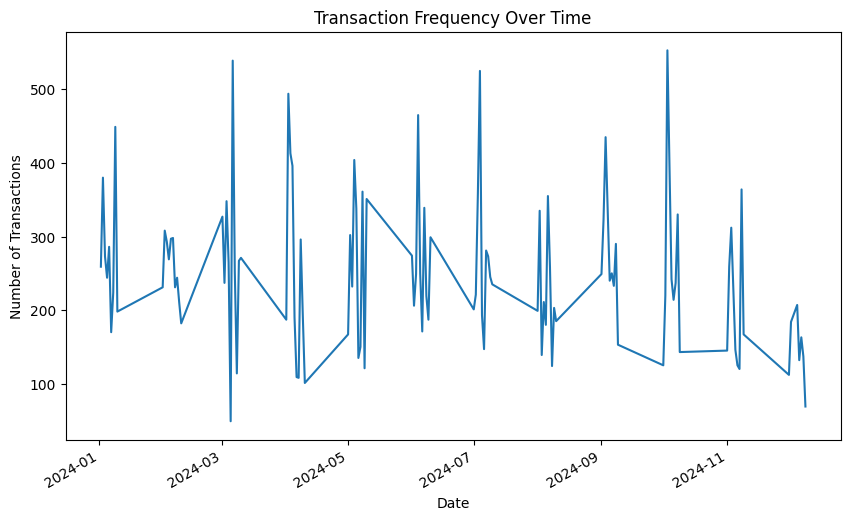

In [20]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan Distribusi Transaksi
plt.figure(figsize=(10, 6))
df['ServTransDate'] = pd.to_datetime(df['ServTransDate'])  # Convert to datetime
df['ServTransDate'].value_counts().sort_index().plot(kind='line')
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


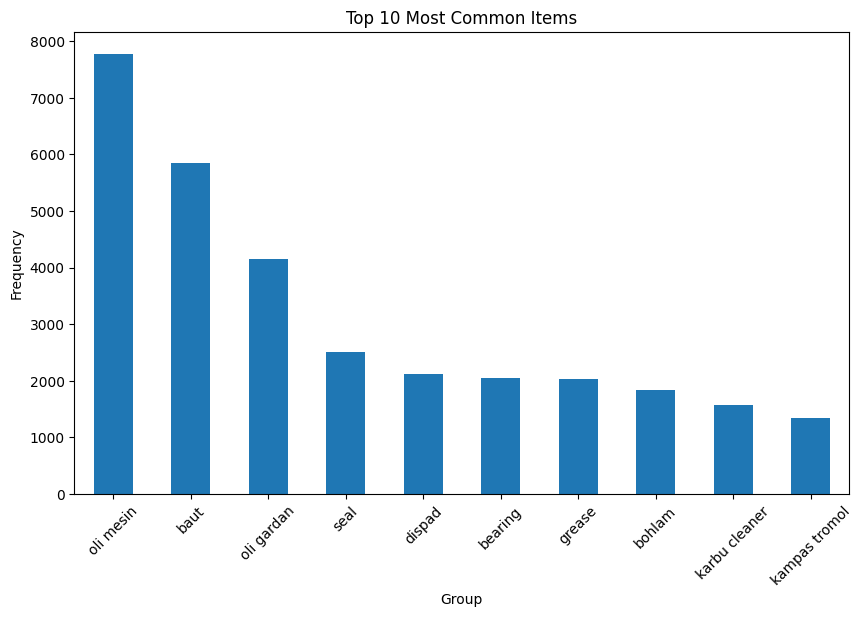

In [22]:
# Menampilkan distribusi barang penjualan
plt.figure(figsize=(10, 6))
df['Group'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Items')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### APRIORI DAN ASOSIASI

In [23]:
#Mengeblompokkan transaksi berdasarkan kolom ServTransCode untuk kolom Items
transaksi = df.groupby('ServTransCode')['Group'].apply(list)

#Mengubah data menjadi bentuk one-hot encoding
te = TransactionEncoder()
tf_encode = te.fit(transaksi).transform(transaksi)
tf_df = pd.DataFrame(tf_encode, columns= te.columns_)

tf_df.shape
#print(tf_df.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7475, 324)

In [27]:
#Memasukkan Algoritma Apriori
frequent_itemsets = apriori(tf_df, min_support=0.1, use_colnames=True)

frequent_itemsets.sort_values(by='support',ascending=False)

# menaruh hasil kedalam folder data
# folder_name = 'data'
# file_path = os.path.join(folder_name, 'hasil_apriori_up_3.xlsx')
# frequent_itemsets.to_excel(file_path, index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
3,0.494983,(oli mesin)
2,0.250167,(oli gardan)
4,0.231171,"(oli mesin, oli gardan)"
0,0.168428,(baut)
1,0.103144,(grease)


In [37]:
# memasukkan Association Rules dengan menggunakan K1 1-itemset
ass_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1, num_itemsets=1)
#Filtering kolom penting
ass_rules_col = ass_rules[['antecedents', 'consequents', 'support', 'confidence','lift' ]]
ass_rules_col

# Antecedents
# Item atau kelompok item yang menjadi kondisi awal dalam aturan asosiasi.
# Misalnya, (Oli Mesin Matic) menunjukkan bahwa aturan dimulai dari pembelian "Oli Mesin Matic".

# Consequents
# Item atau kelompok item yang menjadi hasil dari aturan asosiasi.
# Misalnya, (Baut) berarti "Baut" cenderung dibeli setelah "Oli Mesin Matic".

# Support
# Proporsi transaksi yang mengandung antecedents dan consequents secara bersamaan.
# Misalnya, 0.083333 menunjukkan bahwa 8,33% transaksi mengandung "Oli Mesin Matic" dan "Baut".

# Confidence
# Probabilitas bahwa consequents terjadi jika antecedents terjadi.
# Misalnya, 0.125000 menunjukkan bahwa jika "Oli Mesin Matic" dibeli, ada 12,5% kemungkinan "Baut" juga dibeli.

# Lift
# Rasio pengaruh aturan dibandingkan dengan kejadian independen. Lift > 1 menunjukkan hubungan positif antara antecedents dan consequents.
# Misalnya, 1.500000 menunjukkan bahwa pembelian "Baut" lebih mungkin terjadi jika "Oli Mesin Matic" dibeli.

# folder_name = 'data'
# file_path = os.path.join(folder_name, 'hasil_asosiasi.xlsx')
# ass_rules_col.to_excel(file_path, index=False)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(oli mesin),(oli gardan),0.231171,0.467027,1.866859
1,(oli gardan),(oli mesin),0.231171,0.924064,1.866859


In [29]:
#Sorting berdasarkan Lift
ass_sort= ass_rules_col.sort_values(by = 'lift', ascending = False)
ass_sort.head()

# folder_name = 'data'
# file_path = os.path.join(folder_name, 'sorted_asosiasi.xlsx')
# ass_sort.to_excel(file_path, index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(oli mesin),(oli gardan),0.231171,0.467027,1.866859
1,(oli gardan),(oli mesin),0.231171,0.924064,1.866859


### VISUALISASI HASIL

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


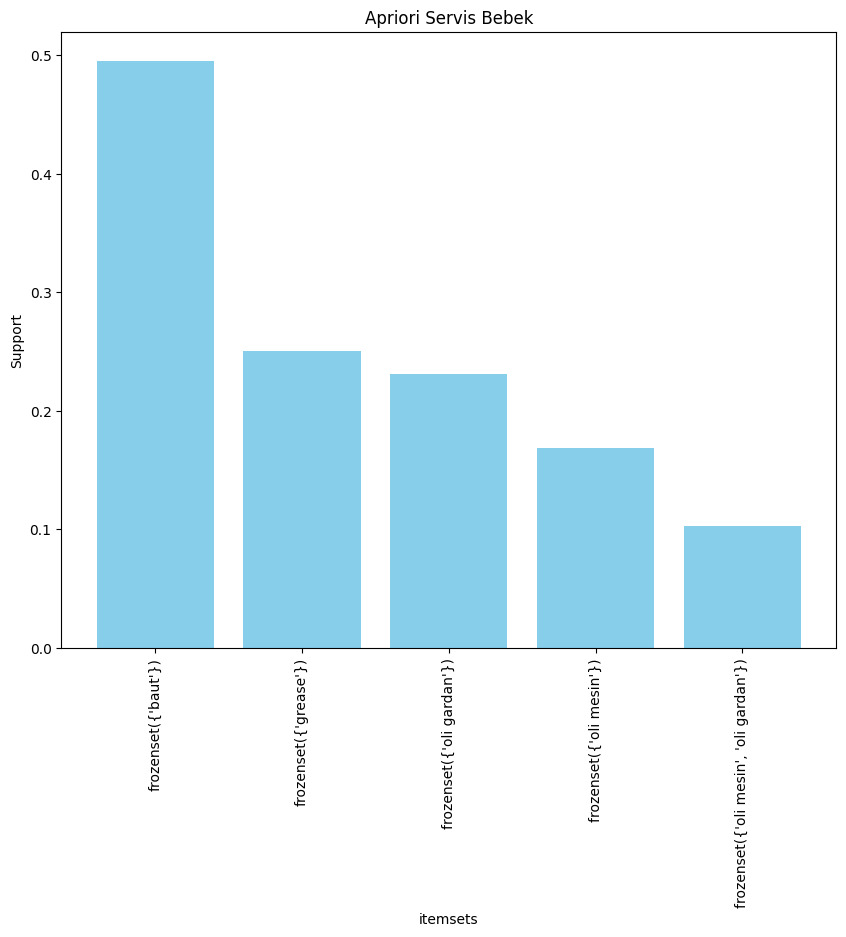

In [36]:
#Visualisasi Bar chart
plt.figure(figsize=(10,8))
plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'].sort_values(ascending = False), color='skyblue')
plt.xlabel('itemsets')
plt.ylabel('Support')
plt.xticks(rotation=90)
plt.title('Apriori Servis Bebek')
plt.show()